<a href="https://colab.research.google.com/github/Buse-cetin/Topic_Modelling/blob/main/text_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bu çalışma dosyasında tweet çekilmkete, çekilen tweetler emoji, noktlama işaretleri, büyük- küçük harf dönüşümü yapılmaktadır, stopwordslerden temizlenme işlmei yapılmaktadır. Extra olarak az- çok geçen kelimleler bulunmaktadır, kelime frekansaları bulunmaktadır fakat bunları topicleme yaparken olan kodumuza eklemeyecğiz.

In [ ]:
!pip install snscrape
import snscrape.modules.twitter as sntwitter
import pandas as pd
import re,string

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 KB 3.0 MB/s eta 0:00:00


Çekilecek Tweet Özelliklerinin Belirlenmesi

In [ ]:
columns=['tweet','label','hashtag','tweetUrl','like','user','date']
data=[]

Data Temizleme Kodu

In [ ]:

def clean_text(text):
    tweet = re.sub("@[A-Za-z0-9]+","",text.lower())
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) 
    tweet = re.sub("</?[a-z]+>", "", tweet) 
    tweet = re.sub("[^\w\s]","",tweet)
    tweet = re.sub("&", "", tweet) 
    tweet = re.sub("\d", "", tweet) 
    tweet = " ".join(tweet.split())
   # tweet = remove_emoji(tweet) 
    tweet = tweet.replace("#", "").replace("_", " ") 
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                           "]+", flags=re.UNICODE)
    
    return emoji_pattern.sub(r'', tweet)
    print(tweet)

Tweet Çekme Fonksiyonu

In [ ]:
def scrap_tweet(hashtag,maxTweet):
    count=1
    for i,tweet in enumerate(sntwitter.TwitterHashtagScraper('{} + lang:tr'.format(hastag)).get_items()):
    #for i,tweet in enumerate(sntwitter.TwitterHashtagScraper('{} + since:2020-01-01 until:2022-03-25 + lang:tr '.format(hastag)).get_items()):
    #for i,tweet in enumerate(sntwitter.TwitterSearchScraper('{} lang:tr'.format(hastag)).get_items()):
        if i>maxTweet:
            break
        data.append([clean_text(tweet.content),'',hastag,tweet.url,tweet.likeCount,tweet.user,tweet.date])
        
        count+=1

Tweet çekme

In [ ]:
maxTweets=10000
hastag="ibbsikayet",
scrap_tweet(hastag,maxTweets)

In [ ]:
maxTweets=10000
hastag="ibbbeyazmasa",
scrap_tweet(hastag,maxTweets)

In [ ]:
maxTweets=10000
hastag="ibbulaştırma",
scrap_tweet(hastag,maxTweets)

In [ ]:
maxTweets=10000
hastag="ibbtrafik",
scrap_tweet(hastag,maxTweets)

In [ ]:
maxTweets=10000
hastag="ispark",
scrap_tweet(hastag,maxTweets)

In [ ]:
maxTweets=10000
hastag="beyazmasa",
scrap_tweet(hastag,maxTweets)

In [ ]:
maxTweets=10000
hastag="iett",
scrap_tweet(hastag,maxTweets)

In [ ]:
maxTweets=10000
hastag="ibb_ulasim",
scrap_tweet(hastag,maxTweets)

In [ ]:
maxTweets=10000
hastag="istanbultrafik",
scrap_tweet(hastag,maxTweets)

In [ ]:
maxTweets=10000
hastag="istanbul_trafik",
scrap_tweet(hastag,maxTweets)

In [ ]:
maxTweets=10000
hastag="istanbulsikayet",
scrap_tweet(hastag,maxTweets)

In [ ]:
d=pd.DataFrame(data,columns=columns)

d.drop_duplicates(subset=['tweet'])

print(d)

d.to_csv('tweek.csv',encoding='utf-8-sig')
        

                                                   tweet label  \
0      dakikadan fazladır taksi ve iki dksı var görün...         
1      olimpiyat cadde üzeri burası pendik buraya ara...         
2      parklarda kontrol ve bakımları aksatarak canla...         
3      parklarda kontrol ve bakımları aksatarak canla...         
4      bugün bir taksici terörüne daha tanık oldumtak...         
...                                                  ...   ...   
61900                         int çok geçmiş olsun hocam         
61901  dün bostancıdan bindiği belediye otobüsü yaşın...         
61902   egm merhaba konu hakkında tc kimlik numaranız...         
61903  ne biçim bir hizmettir bu dakikada bir kalkan ...         
61904  ürün aldım teslim almadımsatıştan gün sonra ip...         

                  hashtag                                           tweetUrl  \
0           (ibbsikayet,)  https://twitter.com/HoneysuckleSym/status/1606...   
1           (ibbsikayet,)  https://twitter.com/

Stopwords Cleaning

In [ ]:
# Advertools kütüphanesini indirmek, yüklemek için
!pip install advertools
import advertools as adv
# Türkçe duraklama kellimelerini değişkene atamak için
stopwords = sorted(adv.stopwords['turkish'])[:]
#print(diger_duraklama_kelimeleri )
tweet = d["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))


tweet.to_csv('stop_clean.csv')
print(data)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.1/310.1 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 271.5/271.5 KB 26.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 68.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.9/93.9 KB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 80.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.3/57.3 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 KB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 KB 9.3 MB/s eta 0:00:00
  Created wheel for PyDispatcher: filename=PyDispatcher-2.0.6-py3-none-any.whl size=11959 sha256=1da20d11cce8dd327d0c53cdc083cc561e67a54e337eef74c24f79ef75b74e78
  Stored in directory: /root/.cache/pip/wheels/dc/b9/4a/

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



EXTRALAR

Az Geçen Kelimelerin Çıkartılması

In [ ]:
d = pd.DataFrame(d, columns = ["tweet"])
pd.Series(" ".join(d["tweet"]).split()).value_counts()
 
# En az geçen kelimeleri sıraladıktan sonra, listenin en sonundaki 3 kelimeyi kendi isteğimze göre çıkardık.
az_gecenler = pd.Series(" ".join(d["tweet"]).split()).value_counts()[-15:]
az_gecenler.to_csv('az_gecen.csv')
print(az_gecenler)

kidevlet                          1
becereksizlik                     1
siyircam                          1
degisiyo                          1
buluniett                         1
aldıolay                          1
realet                            1
sandığım                          1
cümlesine                         1
şoförüsünüz                       1
ettisiz                           1
yükseltmeyebağırmayaazarlamaya    1
döneceklerini                     1
basmadığımı                       1
etmiyorlarne                      1
dtype: int64


İstenmeyen Kelimelerin Çıkartılması

In [ ]:
unwanted_data= [ "pkk","imamoglu","akp","chp","terör","izmir","iki","ibb","ibbsikayet"] 
d = pd.DataFrame(d, columns = ["tweet"])
# Tercihe bağlı olarak oluşturulan istenmeyen kelimeleri attık.

tweet = d["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))
unwanted= tweet.apply(lambda x: " ".join(x for x in x.split() if x not in unwanted_data))
unwanted.to_csv('unwanted_clean.csv')
print(unwanted)

0        dakikadan fazladır taksi dksı görünen otobüsü ...
1        olimpiyat cadde üzeri pendik buraya araç park ...
2        parklarda kontrol bakımları aksatarak canlarla...
3        parklarda kontrol bakımları aksatarak canlarla...
4        bugün bir taksici terörüne tanık oldumtaksici ...
                               ...                        
61900                                     int geçmiş hocam
61901    dün bostancıdan bindiği belediye otobüsü yaşın...
61902    egm merhaba konu hakkında tc kimlik numaranızı...
61903    biçim bir hizmettir dakikada bir kalkan otobüs...
61904    ürün aldım teslim almadımsatıştan gün iptal ma...
Name: tweet, Length: 61905, dtype: object


In [ ]:
da=pd.read_csv('unwanted_clean.csv')
pd.options.display.max_columns=20
da.head(30000)

,Unnamed: 0,tweet
0,0,dakikadan fazladır taksi dksı görünen otobüsü ...
1,1,olimpiyat cadde üzeri pendik buraya araç park ...
2,2,parklarda kontrol bakımları aksatarak canlarla...
3,3,parklarda kontrol bakımları aksatarak canlarla...
4,4,bugün bir taksici terörüne tanık oldumtaksici ...
...,...,...
29995,29995,bostancıdaki tavacı recepin önündeki görevlisi...
29996,29996,genertion seçim öncesi isparkta lılar çalıştır...
29997,29997,ihracatta güzel üretim patladı
29998,29998,şikayet ederiz bugün teşekkür edelim gülümseye...


Kelime Frekansları

In [ ]:
freq_df =unwanted.apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()

In [ ]:
freq_df.columns = ["kelimeler","frekanslar"]

In [ ]:
print(freq_df)

Gözlem Sayısı

In [ ]:
freq_df.shape

(1056, 2)

Ortalamadan Yüksek Olan Kelimelere Bakıyotuz

In [ ]:
freq_df[freq_df.frekanslar > freq_df.frekanslar.mean() + freq_df.frekanslar.std()]

,kelimeler,frekanslar
0,taksi,3.0
5,otobüsü,7.0
13,ibbşikayet,31.0
14,araç,5.0
15,park,5.0
16,zaman,5.0
18,şekilde,5.0
25,cadde,3.0
42,bir,34.0
66,akşam,3.0


Plotbar İle Görselleştirme

In [ ]:
a = freq_df[freq_df.frekanslar > freq_df.frekanslar.mean() + freq_df.frekanslar.std()]

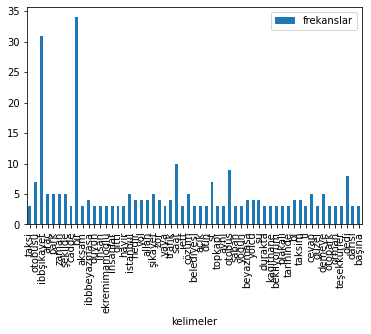

In [ ]:
a.plot.bar (x = "kelimeler", y = "frekanslar");

Word Cloud

In [ ]:
! pip install wordcloud
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Tweetleri Birleştirme Kodu

In [ ]:
all_tweets = " ".join(i for i in  unwanted)

In [ ]:
print(all_tweets)

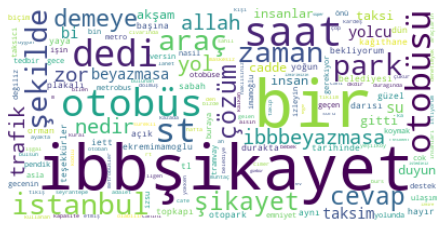

In [ ]:
wordcloud = WordCloud(background_color="white").generate(all_tweets)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

# Yeni Bölüm